In [1]:
using Plots, Printf, DelimitedFiles, BenchmarkTools
using Revise
using MDToolbox
ENV["COLUMNS"] = 130

130

In [8]:
q_array = readdlm("data/quaternion/QUATERNION_LIST_576_Orient")
model_array = readpdb("data/3gb1.pdb");

In [9]:
model_array = model_array["atomname CA"];
decenter!(model_array);

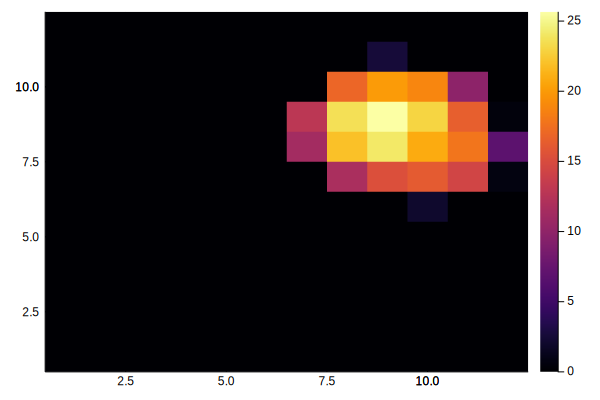

In [10]:
model_rotated = MDToolbox.rotate(model_array[2, :], q_array[7, :])
observed = afmize(model_rotated, AfmizeConfig(30.0))
observed = translateafm(observed, (2, 3))
heatmap(observed)

In [11]:
param_array = [];
for r in [20.0, 30.0, 40.0, 50.0]
  param_array = [param_array; AfmizeConfig(r)]
end

In [12]:
r = getafmposterior(observed, model_array[1:3, :], q_array, param_array)

imodel = 1
imodel = 2
imodel = 3


(2, 7, AfmizeConfig(0.17453292519943295, 30.0, MDToolbox.Point2D{Int64}(-90, -90), MDToolbox.Point2D{Int64}(90, 90), MDToolbox.Point2D{Int64}(15, 15), Dict("SI" => 2.1,"C" => 1.7,"MG" => 1.73,"P" => 1.8,"NE" => 1.54,"O" => 1.52,"B" => 1.92,"AL" => 1.84,"N" => 1.55,"NA" => 2.27…)), (2, 3), [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], 2239.4131457245735)

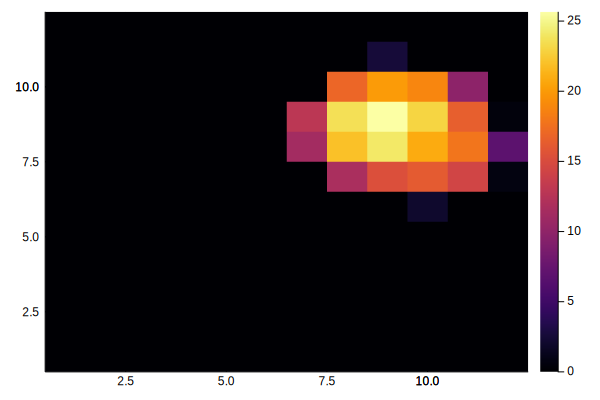

In [13]:
heatmap(r[5])